# Week3授業前課題1 アヤメの分析

## 目的
・データ分析の基本的な流れを知る  
・データ分析ライブラリのPandasに慣れる  

## フィッシャーのアヤメ
「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。  
これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。  
[Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)  
[Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)  
[Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)  
setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。  
1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。  

## データセットの準備
scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

### 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。  
[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)  
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。  
[pandas.DataFrame — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)  

X＝  

|  |sepal_length|sepal_width|petal_length|petal_width|  
|:--:|:--:|:--:|:--:|
|0	|5.1	|3.5	|1.4	|0.2|  
|1	|4.9	|3.0	|1.3	|0.2|  
|2	|4.7	|3.2	|1.3	|0.2|  
|3	|4.6	|3.1	|1.5	|0.2|  
|：|：|：|：|：|  

目的変数も同様にyに格納してください。  
y =

|　	|Species|
|:--:|:--:|
|0	|0|
|1	|0|
|2	|0|
|3	|0|
|：	|：|

In [1]:
# 環境確認のため
import sys
# sys.executable

In [2]:
# pythonのバージョン確認 3系であることを確認
sys.version

'3.7.3 (default, Mar 27 2019, 16:54:48) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [3]:
# パスの確認
# sys.path

In [4]:
# coding utf8
# モジュールのインポート
from sklearn import datasets
import numpy as np
import pandas as pd

# [The Iris Dataset — scikit-learn 0.21.2 documentation]にあるコード実行のため
import matplotlib.pyplot as plt
%matplotlib inline
#import importlib
#importlib.import_module('mpl_toolkits.mplot3d').__path__
''' ☆☆☆☆☆☆☆☆☆☆☆☆
    importでつまづいた時
    Pythonのバージョンを確認する。
    
    パスを確認する！別のところにインストールしていたらパスを追加するなりする！
    パッケージはパスの中に置いてあるはずなのにエラーなる
    →モジュール名が分割されることがある？
        階層が一つ深くなっていた現象
    正:from mpl_toolkits.mplot3d.axes3d import Axes3D
    誤:from mpl_toolkits.mplot3d import Axes3D
    
    疑問：モジュールのインストールの仕方、あるいはバージョンによって、
    名前が微妙に異なることがある？
'''
from mpl_toolkits.mplot3d.axes3d import Axes3D
#import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA

# データ抽出のため
import numexpr

# 図示するため
import seaborn as sns

# 分類のため
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# 評価のため
from sklearn.metrics import accuracy_score

# ガウス混合分布モデルを使用するため
# GMM : Gaussian Mixture Models
'''
    ここもモジュール名に誤りがあった！
    本を参考にする時は、鵜呑みにしちゃダメ！
    正:from mpl_toolkits.mplot3d.axes3d import Axes3D
    誤:from mpl_toolkits.mplot3d import Axes3D
'''
from sklearn.mixture.gaussian_mixture  import  GaussianMixture as GMM

In [5]:
# 【問題1】データの取得
# アヤメのデータをロード、irisに格納
iris = datasets.load_iris()
print(type(iris)) #<class 'sklearn.utils.Bunch'>
#print(iris['data'])
print(iris.data)

<class 'sklearn.utils.Bunch'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 

In [6]:
# PandasのSeries型変数に格納
sepal_length = pd.Series( iris.data[:, 0])
sepal_width =  pd.Series(iris.data[:, 1])
petal_length = pd.Series(iris.data[:, 2])
petal_width =  pd.Series(iris.data[:, 3])

# 説明変数をPandasのDataFrame型変数Xに格納
X = pd.DataFrame({'sepal_length': sepal_length,
                              'sepal_width': sepal_width,
                             'petal_length': petal_length,
                              'petal_width': petal_width})
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
# 目的変数も同様にyに格納
Species= pd.Series(iris.target)
y = pd.DataFrame({'Species': Species})
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


### 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。  
df =  

|　	|sepal_length	|sepal_width	|petal_length	|petal_width	|Species|
|:--:|:--:|:--:|:--:|:--:|:--:|
|0	|5.1	|3.5	|1.4	|0.2	|0|
|1	|4.9	|3.0	|1.3	|0.2	|0|
|2	|4.7	|3.2	|1.3	|0.2	|0|
|3	|4.6	|3.1	|1.5	|0.2	|0|
|:	|：	|：	|：	|：	|:|
  
[Merge, join, and concatenate — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)  
[pandas.concat — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [8]:
# 【問題2】データの結合
# merge関数を使った場合
df_test_merge = pd.merge(X, y, left_index=True, right_index=True)

SQLと似た感覚で書ける！

In [9]:
# joinメソッドを使った場合
df_test_join = X.join(y)

簡潔に書ける！  
簡潔すぎてケアレスミスをした場合、誤りを見逃さないか心配である。  

In [10]:
# pd.concat
df_test_concat = pd.concat([X, y], axis=1)

np.concatenateと同じように書ける。  
パフォーマンスはmergeやjoinの方が良いらしい。

In [11]:
df_test_merge == df_test_join

,sepal_length,sepal_width,petal_length,petal_width,Species
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


In [12]:
df_test_merge is df_test_join

False

In [13]:
df = df_test_merge
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


#### データ型の確認

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
test = df.values

In [16]:
type(test)

numpy.ndarray

In [17]:
test

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

## データの概観

### 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。  
・先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）  
・ラベルごとのサンプル数の合計を出力する。  
・特徴量に欠損値があるかを確認する。  
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。  
.head(),.info(),.describe(),.count(),.isnull(),.sum()などのPandasのメソッドを使ってみましょう。  
[pandas.DataFrame.head — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)  
[pandas.DataFrame.info — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)  
[pandas.DataFrame.describe — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)  
[pandas.DataFrame.count — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)  
[pandas.DataFrame.isnull — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)  
[pandas.DataFrame.sum — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)  

In [18]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


全て数値データのように見える。

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


>sepal_length    150 non-null float64  
sepal_width     150 non-null float64  
petal_length    150 non-null float64  
petal_width     150 non-null float64  

データ型はfloat64、int64である。

In [20]:
# ラベルごとのサンプル数の合計を出力する。
df.Species.value_counts(sort=False)

0    50
1    50
2    50
Name: Species, dtype: int64

In [21]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
# 特徴量に欠損値があるかを確認する。
# df.isnull()で各要素がnullであるか否をチェック判定する, 欠損値であればTrue
print(df.isnull().head())
# df[df.isnull()]でTrueであった値を返す、FalseであればNaN
print(df[df.isnull()].head())
# .dropna()でNanを除外する
print(df[df.isnull()].dropna().head())

   sepal_length  sepal_width  petal_length  petal_width  Species
0         False        False         False        False    False
1         False        False         False        False    False
2         False        False         False        False    False
3         False        False         False        False    False
4         False        False         False        False    False
   sepal_length  sepal_width  petal_length  petal_width  Species
0           NaN          NaN           NaN          NaN      NaN
1           NaN          NaN           NaN          NaN      NaN
2           NaN          NaN           NaN          NaN      NaN
3           NaN          NaN           NaN          NaN      NaN
4           NaN          NaN           NaN          NaN      NaN
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, Species]
Index: []


Empty DataFrameなので、欠損値は存在しないようである。

In [23]:
# 逆に欠損値でない(notnull)値をカウント
df[df.notnull()].dropna().count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
Species         150
dtype: int64

全ての要素に値が存在するようである。

#### こちらの方が良かった

In [24]:
# 特徴量に欠損値があるかを確認する。
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [25]:
# 各列の合計を求める
df.sum()

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64

#### 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

>アイリスの花のデータセット
アイリスの花のデータセットまたはフィッシャーのアイリスのデータセットは、イギリスの統計 学者および生物学者の Ronald Fisherによって1936年の論文で紹介された多変量 データセットです。 線形判別分析の例としての分類問題における複数の測定の使用 。 Edgar Andersonが3つの近縁種のアイリスの花の形態学的変動を定量化するためにデータを収集したため、 アンダーソンのアイリスデータセットと呼ばれることがあります。 3つの種のうち2つは「すべて同じ牧草地から採取され、同じ日に採集され、同じ装置で同じ人が同時に測定した」とガスペ半島に集められた。   
  
>データセットは、３種類のアイリス （ アイリス・セトサ 、 アイリス・バージニカおよびアイリス・バーシカラー ）のそれぞれからの５０個のサンプルからなる。 各サンプルから4つの特徴 、センパル単位でのpと花弁の長さと幅を測定しました。 これら4つの特徴の組み合わせに基づいて、Fisherは種を互いに区別するための線形判別モデルを開発しました。  

[Iris flower data set - Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)をGoogle翻訳


    ここもモジュール名に誤りがあった！
    本を参考にする時は、鵜呑みにしちゃダメ！
    正:from mpl_toolkits.mplot3d.axes3d import Axes3D
    誤:from mpl_toolkits.mplot3d import Axes3D



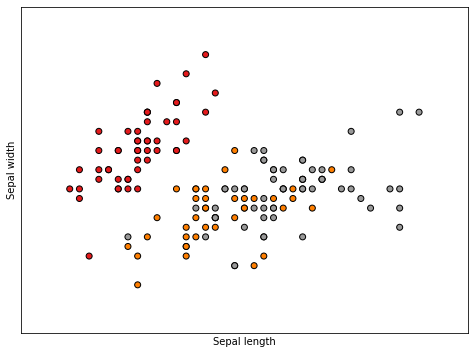

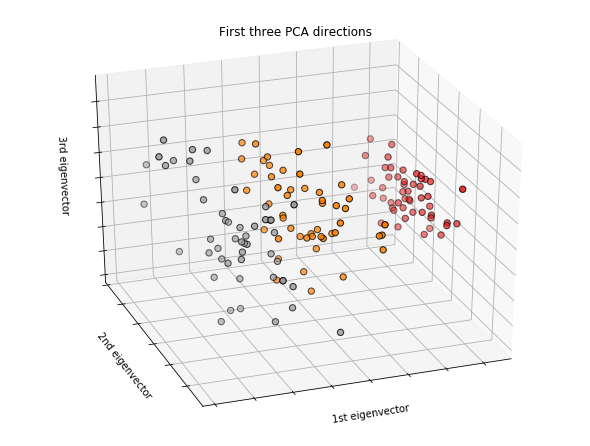

In [26]:
# The Iris Dataset — scikit-learn 0.21.2 documentationより引用したコード
# コードは理解出来ていない

print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# importはノート前半にまとめる
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn import datasets
#from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

[The Iris Dataset — scikit-learn 0.21.2 documentation](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## 特徴量についての探索
各特徴量や特徴量同士の関係を見ていきます。

### 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。  
・sepal_widthの列を３つの異なる方法で抽出する  
・50番目から99番目までのデータを抽出する  
・petal_lengthの列の50番目から99番目までのデータを抽出する  
・petal_widthの値が0.2のデータを抽出する  
.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。  

In [27]:
#【問題5】必要なデータを抽出
# sepal_widthの列を３つの異なる方法で抽出する_1
df['sepal_width'].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [28]:
# sepal_widthの列を３つの異なる方法で抽出する_2
df.sepal_width.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [29]:
# sepal_widthの列を３つの異なる方法で抽出する_3
df.iloc[:, 1].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [30]:
# locを使用した場合

try:
    df.loc[:, 1].head()
except TypeError :
    print('TypeError ')

TypeError 


In [31]:
# ixを使用した場合
df.ix[:, 1].head()

/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

使うなって怒られる。

In [32]:
# eval()を使用した場合
df.eval('sepal_width').head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
dtype: float64

In [33]:
# 50番目から99番目までのデータを抽出する
df[50:100].head()

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


**終わりのインデックス要素はスライスに含まれないので注意する。**

In [34]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df.loc[50:99, 'petal_length'].head()

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal_length, dtype: float64

In [35]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df.iloc[50:100, 3].head()

50    1.4
51    1.5
52    1.5
53    1.3
54    1.5
Name: petal_width, dtype: float64

#### locとilocの違いについて_要修正！！！！！
df.loc\[50:99\]では明示的にインデックスが50から99の要素が取り出される。  
df.iloc\[50:100\]では暗黙的に標準のリストやNumPy配列と同じようにスライシングする。終わりのインデックス要素はスライスに含まれない。
[Pythonチュートリアル](https://docs.python.org/ja/3/tutorial/introduction.html)によるとリストのスライシングの番号の取り方は以下の通りである。
>スライスの使い方をおぼえる良い方法は、インデックスが文字と文字の あいだ (between) を指しており、最初の文字の左端が 0 になっていると考えることです。そうすると、 n 文字からなる文字列中の最後の文字の右端はインデックス n となります。例えばこうです:  
 +---+---+---+---+---+---+  
 | P | y | t | h | o | n |  
 +---+---+---+---+---+---+  
 0   1   2   3   4   5   6  
-6  -5  -4  -3  -2  -1  
1行目の数字は文字列の 0 から 6 までのインデックスの位置を示しています; 2行目は対応する負のインデックスを示しています。i から j までのスライスは、それぞれ i と付いた境界から j と付いた境界までの全ての文字から成っています。
  
また、df.locではindexの指定はdf.index

In [36]:
print("df.loc[1]:\n{}".format(df.loc[1]))
print("df.iloc[1]:\n{}".format(df.iloc[1]))

df.loc[1]:
sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Species         0.0
Name: 1, dtype: float64
df.iloc[1]:
sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Species         0.0
Name: 1, dtype: float64


In [37]:
print("df.loc[1]:\n{}".format(df.loc[1:3]))
print("df.iloc[1]:\n{}".format(df.iloc[1:3]))

df.loc[1]:
   sepal_length  sepal_width  petal_length  petal_width  Species
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
df.iloc[1]:
   sepal_length  sepal_width  petal_length  petal_width  Species
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0


In [38]:
print("df.loc[1]:\n{}".format(df.loc[1:3, 'petal_length']))

df.loc[1]:
1    1.4
2    1.3
3    1.5
Name: petal_length, dtype: float64


In [39]:
print("df.iloc[1]:\n{}".format(df.iloc[1:3,1]))

df.iloc[1]:
1    3.0
2    3.2
Name: sepal_width, dtype: float64


In [40]:
print(df.index)

RangeIndex(start=0, stop=150, step=1)


In [41]:
# petal_widthの値が0.2のデータを抽出する
# マスクを使用
df[(df.petal_width == 0.2)]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


In [42]:
# pandas.eval()を使用した場合
pd.eval('df[(df.petal_width == 0.2)]')

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
10,5.4,3.7,1.5,0.2,0.0
11,4.8,3.4,1.6,0.2,0.0
14,5.8,4.0,1.2,0.2,0.0


In [43]:
# df.query()を使用した場合
df.query('petal_width == 0.2')

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


#### 計算時間について

In [44]:
print("マスクの計算時間:")
%timeit df[(df.petal_width == 0.2)]
print("eval関数の計算時間:")
%timeit pd.eval('df[(df.petal_width == 0.2)]')
print("queryメソッドの計算時間:")
%timeit df.query('petal_width == 0.2')

マスクの計算時間:
448 µs ± 9.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
eval関数の計算時間:
13.2 ms ± 852 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
queryメソッドの計算時間:
1.31 ms ± 38.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


データ数が150、特徴量の数が5で、条件が一つの特徴量の指定のみでのデータ抽出の場合、  
マスクがqueryメソッドの3倍速い。  
queryメソッドはeval関数の10倍速い。  
この場合、マスクが最も速く、eval関数が最も遅い。  

### 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。  
ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）  
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する  
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する  
箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。  

0    0.333333
1    0.333333
2    0.333333
Name: Species, dtype: float64


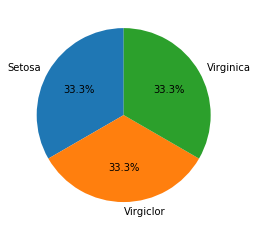

In [45]:
# 円グラフを描画
# value_countsで要素の出現回数を計算
# 引数sort=False:自動ソートしない
# normalize=True:割合を出す
print(df.Species.value_counts(sort=False, normalize=True))

df_species = df.Species.value_counts(sort=False, normalize=True)

# plt.pieで円グラフで出力
# startangle=90:90度のところからグラフを開始
# autopct="%.1f%%":割合をパーセントで小数点以下1位まで表示
plt.pie(df_species, labels = ['Setosa', 'Virgiclor', 'Virginica'],
           startangle=90, autopct="%.1f%%")

plt.show()

In [46]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
# Speciesの値ごとにデータを分割したい
df.groupby('Species')
# 集約関数を使わないとデータが返ってこない？
print(df.groupby('Species').apply)

<bound method _GroupBy.apply of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1a1d352f98>>


In [47]:
df.groupby(['Species']).groups

{0: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 1: Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
            dtype='int64'),
 2: Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
             113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
             139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
            dtype='int64')}

In [48]:
df_groups_species = df.groupby(['Species']).groups

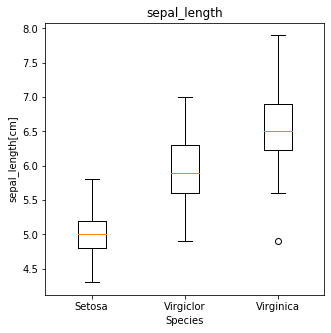

In [49]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

plt.figure(figsize=(5,5))

df_setosa = df.query('Species == 0')
df_virgiclor = df.query('Species == 1')
df_virginica =  df.query('Species == 2')

plt.title('sepal_length')
plt.xlabel('Species')
plt.ylabel('sepal_length[cm]')
# このデータの分け方、もっと綺麗に出来ないのか
plt.boxplot([df_setosa.sepal_length, df_virgiclor.sepal_length, df_virginica.sepal_length]
                  ,labels = ['Setosa', 'Virgiclor', 'Virginica'])
plt.show()

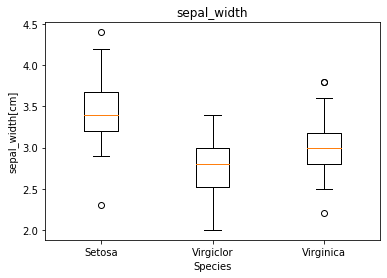

In [50]:
plt.title('sepal_width')
plt.xlabel('Species')
plt.ylabel('sepal_width[cm]')
# このデータの分け方、もっと綺麗に出来ないのか
plt.boxplot([df_setosa.sepal_width, df_virgiclor.sepal_width, df_virginica.sepal_width]
                  ,labels = ['Setosa', 'Virgiclor', 'Virginica'])
plt.show()

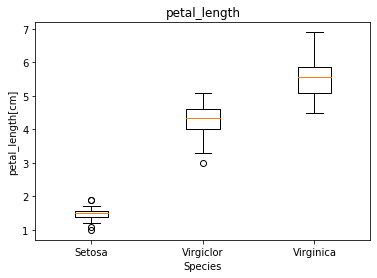

In [51]:
plt.title('petal_length')
plt.xlabel('Species')
plt.ylabel('petal_length[cm]')
# このデータの分け方、もっと綺麗に出来ないのか
plt.boxplot([df_setosa.petal_length, df_virgiclor.petal_length, df_virginica.petal_length]
                  ,labels = ['Setosa', 'Virgiclor', 'Virginica'])
plt.show()

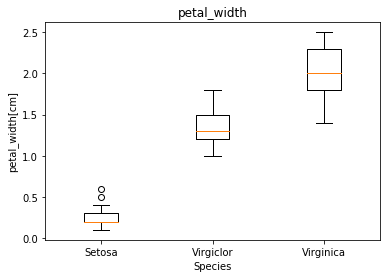

In [52]:
plt.title('petal_width')
plt.xlabel('Species')
plt.ylabel('petal_width[cm]')
# このデータの分け方、もっと綺麗に出来ないのか
plt.boxplot([df_setosa.petal_width, df_virgiclor.petal_width, df_virginica.petal_width]
                  ,labels = ['Setosa', 'Virgiclor', 'Virginica'])
plt.show()

#### データの分け方を工夫したい

In [53]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
# Speciesの値ごとにデータを分割したい
df.groupby('Species') #groupbyオブジェクトが出来る
df.groupby(['Species']).groups  #indexのリストが返る

{0: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 1: Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
            dtype='int64'),
 2: Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
             113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
             139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
            dtype='int64')}

boxplotに渡す形に出来なかった。

In [54]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
# plt.violinplot?

# Speciesが数値なので、種名の列を加える
# 種名のコード変換表を作る
df_species_names = pd.DataFrame({'species_seq': [0, 1, 2],
                                                        'species_name': ['Setosa', 'Virgiclor', 'Virginica']})
# キーを指定してマージする
df_spicies_fixed = pd.merge(df, df_species_names, 
                                            left_on='Species', right_on='species_seq')
# キーに使った列は不要なのでドロップする
# 列なのでaxis=1
df_spicies_fixed = df_spicies_fixed.drop('species_seq', axis=1)
df_spicies_fixed = df_spicies_fixed.drop('Species', axis=1)
# 50データおきに表示
df_spicies_fixed[::50]

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Virgiclor
100,6.3,3.3,6.0,2.5,Virginica


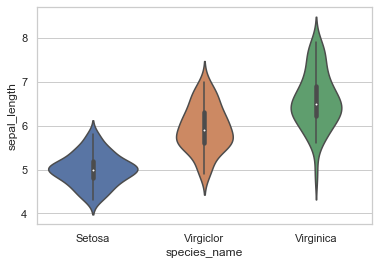

In [55]:
sns.set(style='whitegrid')

# 単位つけたほうが良い
ax = sns.violinplot('species_name', 'sepal_length', data=df_spicies_fixed)

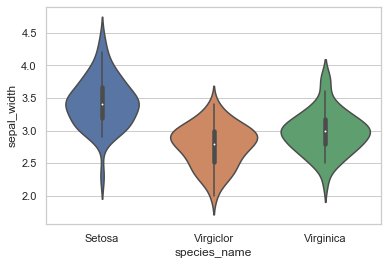

In [56]:
ax = sns.violinplot('species_name', 'sepal_width', data=df_spicies_fixed)

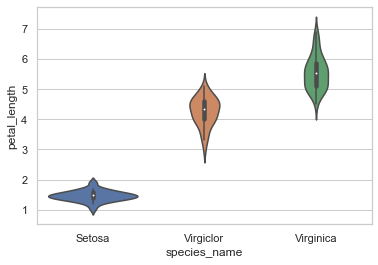

In [57]:
ax = sns.violinplot('species_name', 'petal_length', data=df_spicies_fixed)

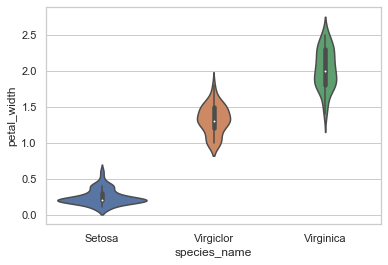

In [58]:
ax = sns.violinplot('species_name', 'petal_width', data=df_spicies_fixed)

>箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。
  
箱ひげ図は、最大値、最小値をひげの上下両端に、第1四分位点から第3四分位点までの高さに箱を描き，中央値に仕切りを挿入する。データのばらつき具合を表現するのに有用なタイプのグラフになる。  
バイオリン図は箱の両端を確率密度で表現している。

### 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。  
・縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る  
・全ての組み合わせの散布図を一度に表示させる、散布図行列を作る  
・４つの特徴量に関する相関係数行列を作る  
・相関係数行列のヒートマップを作る  
相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。  
[pandas.DataFrame.corr — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)  

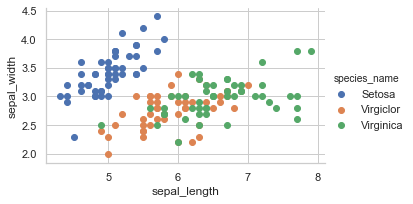

In [59]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
fg = sns.FacetGrid(data=df_spicies_fixed, hue='species_name'
                            ,aspect=1.61)
fg.map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

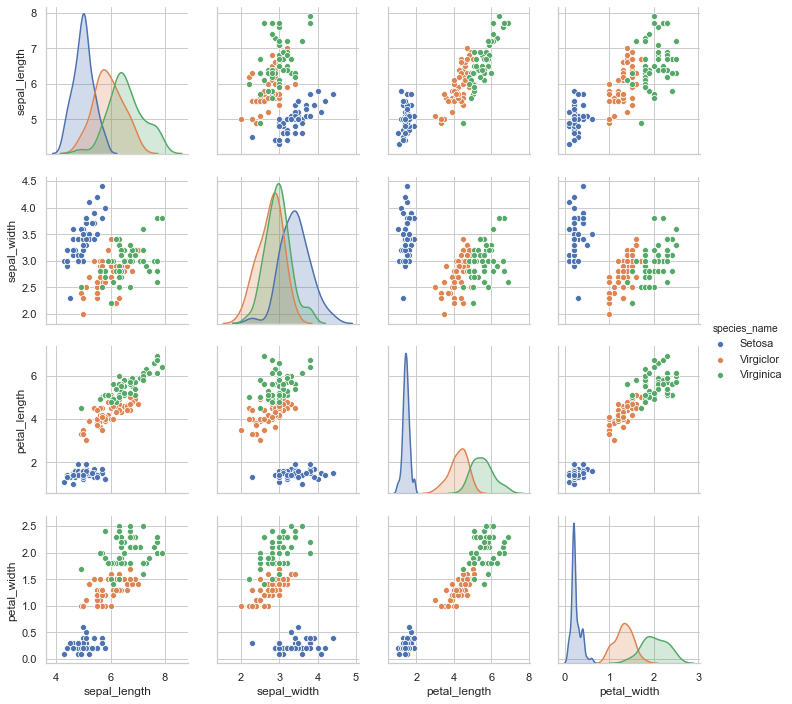

In [60]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
# Species同士の組み合わせの散布図は表示しないため,df.iloc[:, :4]
sns.pairplot(df_spicies_fixed, hue='species_name')
plt.show()

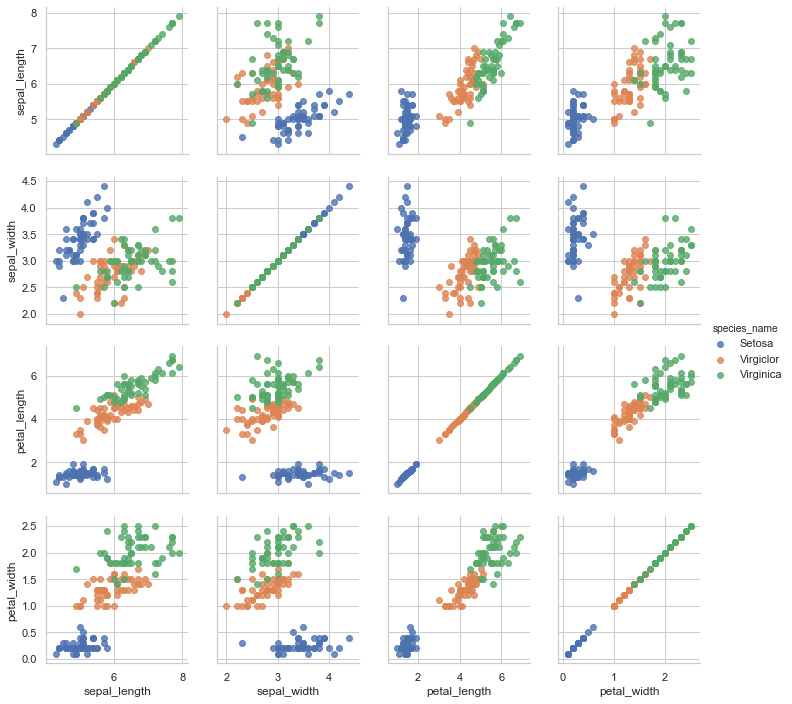

In [61]:
# ４つの特徴量に関する相関係数行列を作る
g = sns.PairGrid(df_spicies_fixed, vars=['sepal_length', 'sepal_width', 
                                                             'petal_length', 'petal_width']
                        ,hue='species_name')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

 'petal_length'と'petal_width'は相関が高そうである。

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


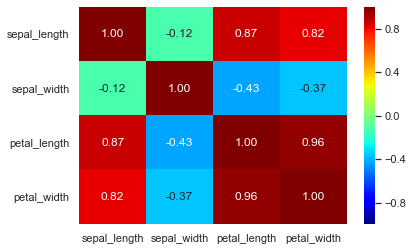

In [62]:
# 相関係数行列のヒートマップを作る

# 相関行列を作る
'''pd.corr()の引数についての覚書
'pearson': ピアソンの積率相関係数（デフォルト）
'kendall': ケンドールの順位相関係数
'spearman': スピアマンの順位相関係数
'''
df_corr = df_spicies_fixed.corr()
print(df_corr)
# 色が直感的に分かりづらいので、変更したい
sns.heatmap(df_corr, annot=True, fmt="1.2f",
                    vmax=1, vmin=-1, center=0, cmap="jet")

'sepal_width'は他のどの特徴量とも相関が高く無いようである。

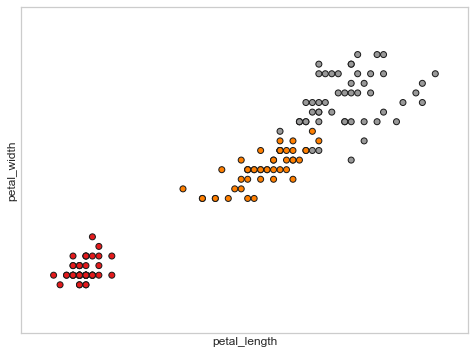

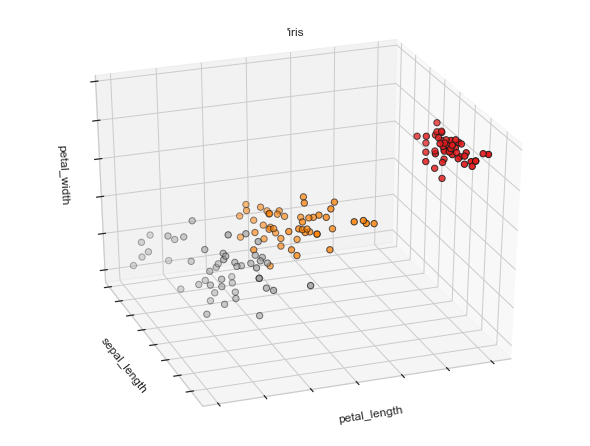

In [63]:
x_min, x_max = df_spicies_fixed.iloc[:, 2].min() - .5, df_spicies_fixed.iloc[:, 2].max() + .5
y_min, y_max = df_spicies_fixed.iloc[:, 3].min() - .5, df_spicies_fixed.iloc[:, 3].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(df_spicies_fixed.iloc[:, 2], df_spicies_fixed.iloc[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(df_spicies_fixed.iloc[:, 2], df_spicies_fixed.iloc[:, 0], df_spicies_fixed.iloc[:, 3]
           , c=y,cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("'iris")
ax.set_xlabel("petal_length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal_length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal_width")
ax.w_zaxis.set_ticklabels([])

plt.show()

3Dで表現したら、'petal_length'の向きが逆になってしまった。

### 【問題8】簡単な考察
データを探索した時には、考察をすることが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。  
例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。  

Setosaは、petal_length、petal_widthともに小さい値をとるが、sepal_widthの値は比較的大きい。  
Virgiclor、Virginicaを比較すると、virginicaがどの特徴量に関しても、大きい値をとる。  

#### おまけ

##### 教師あり学習(ガウシアンナイーブベイズ)

各種類が特徴量をガウス分布にしたがって持つと仮定する。  
ガウシアンナイーブベイズというモデルが使えるらしい。

In [64]:
# 訓練データとテストデータに分ける
# sklearn.model_selection.train_test_splitで分けられる
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
# Xtrain, Xtest, ytrain, ytest 

In [65]:
# ガウシアンナイーブベイズモデルのインスタンス化
model = GaussianNB()
# モデルに訓練データを当てはめる
model.fit(Xtrain, ytrain) 
# テストデータに対する目的変数の予測
y_model = model.predict(Xtest)

In [66]:
# sklearn.metrics.accuracy_scoreで予測の評価ができる
accuracy_score(ytest, y_model)

0.8157894736842105

81%の正解率である。  
各種類の特徴量をガウス分布にしたがっている傾向がある。

##### 教師なし学習（主成分分析；Principal Component Analysis、PCA）

特徴量が４つあるので、主成分分析により次元削減を行う。  
>PCA: 各データポイントからあるベクトルに投射した距離を最小にするようなベクトルを選ぶ。  

[(K-Means)、主成分分析 (PCA) - Qiita](https://qiita.com/katsu1110/items/10ae4a62cfd37e37cd0b)

あとで見たい  
[10分でわかる主成分分析(PCA) - SlideShare](https://www.slideshare.net/takanoriogata1121/10pca-49324044)

In [67]:
# 2次元にする
model = PCA(n_components=2) 
# 教師なしなので特徴量のみ与える
model.fit(X) 
# モデルを２次元データに変換する(?)
X_2D = model.transform(X) 

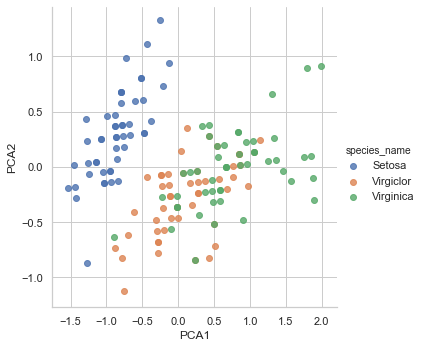

In [68]:
df_pca = df_spicies_fixed
df_pca['PCA1'] = X_2D[:, 0]
df_pca['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species_name', data=df_pca, fit_reg=False)

これで綺麗に分けられたと言うのか私には分からない。  
Setosaしか分けられていないように思える。  
２次元に圧縮するのは少し難しいのかもしれない。  

##### 教師なし学習（クラスタリング）
種類毎のデータがガウス分布の集合であると仮定して、ガウス混合モデル(GMM)でクラスタリングする。

In [69]:
# モデルのインスタンス化

# ３つのクラスに分ける
model = GMM(n_components=3,
            covariance_type='full') 
# 教師なしなので特徴量のみ与える
model.fit(X)
# 目的変数を与える
y_gmm = model.predict(X) 

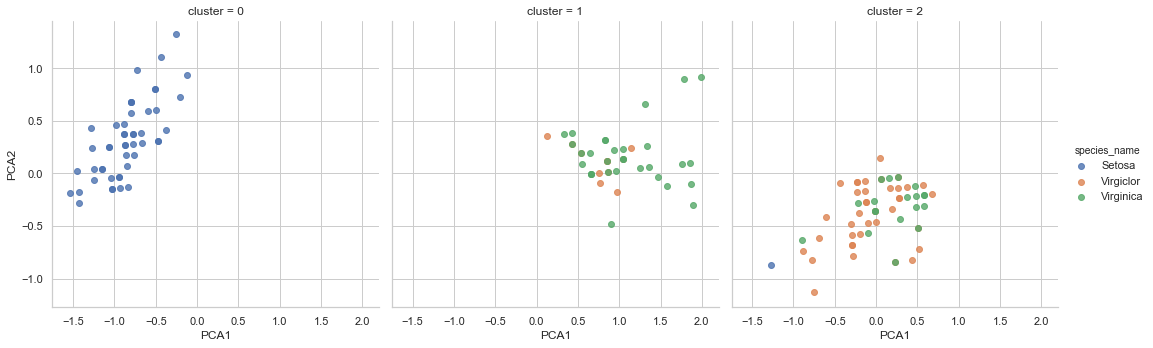

In [70]:
df_pca['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df_pca, hue='species_name',
           col='cluster', fit_reg=False)

Setosaのクラスターはきれいに分けることができている。  
Virgiclorのクラスターは１割ほどVirginicaが混ざっている。  
Virginicaのクラスターは、Setosaの外れ値と思われるサンプルがひとつ、Virgiclorがこのクラスターの3割ほど混ざっている。
GMMでのVirgiclorとVirginicaのクラスタリングはあまり正確でないようである。  

余裕があれば、K-means法を勉強して実装してみたかった。